In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Definir função para pré-processamento do texto (substitua conforme necessário)
def preprocess_text(text):
    return text

In [3]:
# Listas de palavras positivas e negativas
palavras_positivas = ['safe', 'secure', 'values', 'order', 'law', 'family', 'children', 'kid', 'bible', 'holy', 'land', 'homeland', 'life', 'people']
palavras_negativas = ['immigrant', 'disaster', 'border', 'threat', 'thief', 'rape', 'illegal', 'drug', 'molester', 'traffic', 'trespass', 'violence', 'abortion', 'swamp', 'lock', 'jail', 'crook']


In [4]:
# Função para análise de sentimentos
def sentiment_analysis(text):
    positive_count = sum([text.count(word) for word in palavras_positivas])
    negative_count = sum([text.count(word) for word in palavras_negativas])
    return positive_count, negative_count

In [5]:
# Caminho do arquivo limpo
cleaned_file_path = r"C:\Users\rebec\OneDrive\Documentos\tweets_cleaned.csv"

In [6]:
# Carregar o arquivo CSV em um dataframe
tweets_df = pd.read_csv(cleaned_file_path)

In [7]:
# Aplicar a função de pré-processamento aos textos dos tweets
tweets_df['Cleaned Text'] = tweets_df['Tweet Text'].astype(str).apply(preprocess_text)

In [8]:
# Aplicar a análise de sentimentos aos textos limpos
tweets_df['Positive Words'], tweets_df['Negative Words'] = zip(*tweets_df['Cleaned Text'].apply(sentiment_analysis))

In [9]:
# Determinar o sentimento do tweet
tweets_df['Sentiment'] = tweets_df['Positive Words'] - tweets_df['Negative Words']
tweets_df['Sentiment Label'] = tweets_df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [10]:
# Visualizar a distribuição dos sentimentos
sentiment_counts = tweets_df['Sentiment Label'].value_counts()

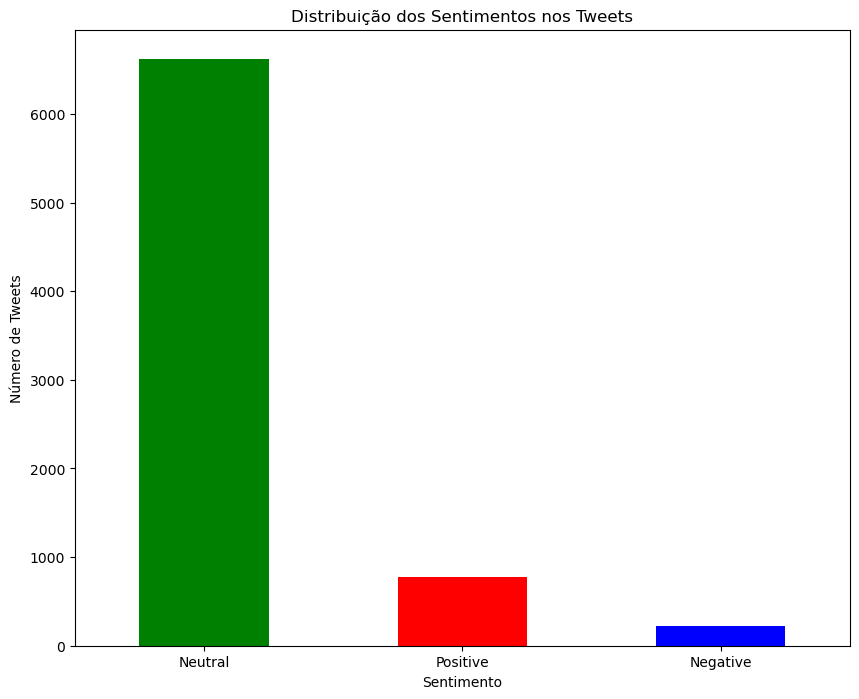

In [11]:
plt.figure(figsize=(10, 8))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribuição dos Sentimentos nos Tweets')
plt.xlabel('Sentimento')
plt.ylabel('Número de Tweets')
plt.xticks(rotation=0)
plt.show()